<a href="https://colab.research.google.com/github/rishabh291/pancard/blob/main/PANCARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
o = Image.open(requests.get('https://www.digitalindiagov.in/wp-content/uploads/2021/07/new-correction-in-pan-card-500x500-1.jpg', stream=True).raw)


In [ ]:
t = Image.open(requests.get('https://5.imimg.com/data5/BN/WE/NZ/ANDROID-33737889/product-jpeg-500x500.jpeg', stream=True).raw)

In [ ]:
print("orignal image format : ",o.format)
print("tampered image format : ",t.format)
print("tampered image format : ",t.size)
print("orignal image format : ",o.size)

orignal image format :  JPEG
tampered image format :  JPEG
tampered image format :  (500, 323)
orignal image format :  (500, 315)


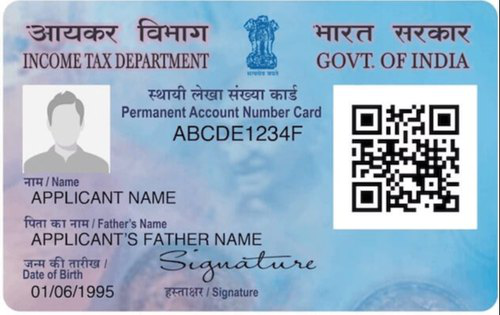

In [ ]:
o

In [ ]:
o = o.resize((250,160))
t = t.resize((250,160))
print(o.size)
print(t.size)


(250, 160)
(250, 160)


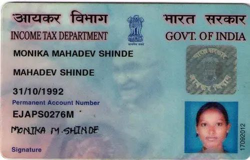

In [ ]:
t

In [ ]:
o.save('pan_card_tampering/image/o.png')
t.save('pan_card_tampering/image/t.png')

In [ ]:
o = cv2.imread('pan_card_tampering/image/o.png')
t = cv2.imread('pan_card_tampering/image/t.png')

In [ ]:
o_gray = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY)
t_gray = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)

In [ ]:
(score,diff) = structural_similarity(o_gray,t_gray, full=True)
diff = (diff*255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.24113226435355084


In [ ]:
thresh = cv2.threshold(diff, 0,255,cv2.THRESH_BINARY_INV  | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(o, (x,y), (x+w, y+h),(0,0,255),2)
  cv2.rectangle(t,(x,y), (x+w, y+h),(0,0,255),2)

t Format Image


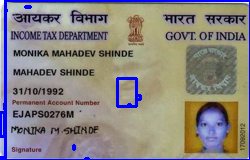

In [ ]:
print('t Format Image')
Image.fromarray(t)

o Format Image


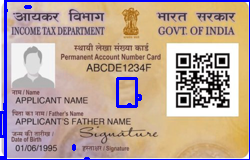

In [ ]:
print('o Format Image')
Image.fromarray(o)

Different Image


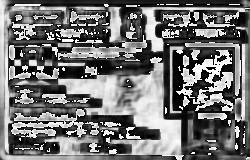

In [ ]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


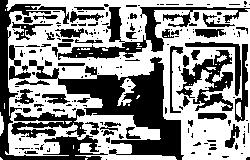

In [ ]:
print('Threshold Image')
Image.fromarray(thresh)